# QOSF APPLICATION 
## Task 2 
Implement a circuit that returns |01> and |10> with equal probability.

### Requirements :

-The circuit should consist only of CNOTs, RXs and RYs. 

-Start from all parameters in parametric gates being equal to 0 or randomly chosen. 

-You should find the right set of parameters using gradient descent (you might use more advanced optimization methods if you like). 

-Simulations must be done with sampling - i.e. a limited number of measurements per iteration and noise. 

-Compare the results for different numbers of measurements: 1, 10, 100, 1000. 

### Bonus question:

How to make sure you produce state |01> + |10> and not |01> - |10> ?



# Notebook Imports

In [19]:
  
from qiskit import * 
from qiskit.visualization import *
from qiskit.quantum_info import Statevector

S_simulator=Aer.backends(name='statevector_simulator')[0]
M_simulator=Aer.backends(name='qasm_simulator')[0]

import matplotlib.pyplot as plt
from numpy import pi,e 
import numpy as np 

from mpl_toolkits.mplot3d.axes3d import Axes3D 

%matplotlib inline

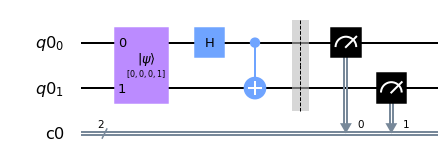

In [2]:
'''
We see that in a simple two qubit system initialzing in |01> |11> yields thesi + and psi minus bell states,
which gives us desired states in equal probabilities. The test circuit is used here to see how one would do
this task without restrictions placed upon them. We have to start from where we know to learn what we dont. 

How can I use Rx and Ry to subsitute the H gate? That is the first problem to tackle in this Task. 

''' 
test1=QuantumRegister(2)
test2=ClassicalRegister(2)
test=QuantumCircuit(test1,test2)

test.initialize([0,0,0,1], [test1[0],test1[1]]) # Initialize | 0 1 > or | 1 0 >  then apply h then cx to get psi+ or psi-

test.h(0)
test.cx(0,1)
test.barrier()
test.measure(0,0)
test.measure(1,1)

test.draw(output='mpl')

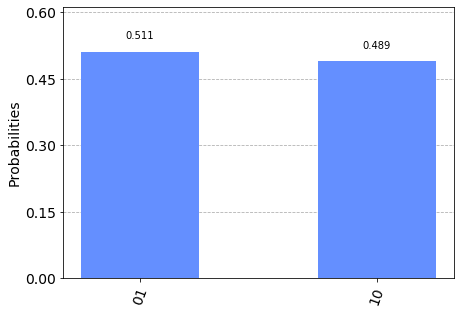

In [3]:
# Check That the test circuit does what it is supposed to

test_job=execute(test, M_simulator)
hist=test_job.result().get_counts()
plot_histogram(hist)

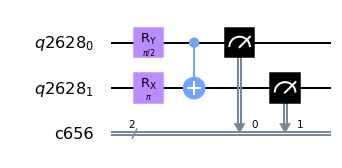

In [36]:
##THIS WORKS! This is what we are going for 

# A choice of thetas that work and their results to check 

qreg=QuantumRegister(2)
creg=ClassicalRegister(2)
q = QuantumCircuit(qreg, creg)


q.rx(pi,1)
q.ry(pi/2,0)
q.cx(0,1)


q.measure(0,0)
q.measure(1,1)

q.draw(output='mpl') 



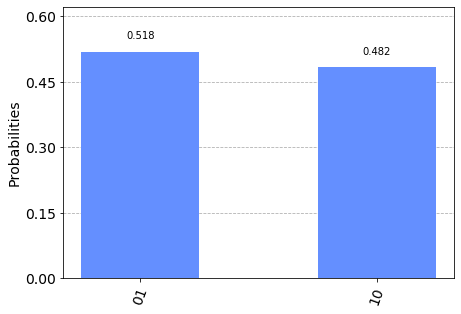

In [37]:
# Check That the test circuit does what it is supposed to

test_job=execute(test, M_simulator)
hist=test_job.result().get_counts()
plot_histogram(hist)

## Take a look at $Rx(\theta)$ and $Ry(\theta)$


In [21]:
def check_rx_ry(theta_x, theta_y):

    qreg=QuantumRegister(2)
    creg=ClassicalRegister(2)
    q = QuantumCircuit(qreg, creg)


    q.rx(theta_x,1)
    q.ry(theta_y,0)
    q.cx(0,1)

    job=execute(q, S_simulator)
    ket=job.result().get_statevector()
    
    psi=Statevector(ket)
    probabilities = psi.probabilities()
    return ket, probabilities


In [22]:
angles=[-2*pi, -3*pi/2, -pi, -pi/2, 0, pi/2, pi, 3*pi/2, 2*pi]

In [29]:
for i in angles: 
    for j in angles: 
        ket, probabilities = check_rx_ry(i, j)
        p01=round(probabilities[1],1)
        p10=round(probabilities[2],1)
        if (p01 and p10)==0.5: 
            print('theta_x: ', i, 'theta_y: ', j)
            print('ket: ', ket, 'probabilities: ', probabilities)

theta_x:  -3.141592653589793 theta_y:  -4.71238898038469
ket:  [ 4.32978028e-17+0.j         -4.32978028e-17+0.70710678j
 -4.32978028e-17+0.70710678j  4.32978028e-17+0.j        ] probabilities:  [1.87469973e-33 5.00000000e-01 5.00000000e-01 1.87469973e-33]
theta_x:  -3.141592653589793 theta_y:  -1.5707963267948966
ket:  [ 4.32978028e-17+0.00000000e+00j -4.32978028e-17-7.07106781e-01j
 -4.32978028e-17+7.07106781e-01j -4.32978028e-17+5.30245156e-33j] probabilities:  [1.87469973e-33 5.00000000e-01 5.00000000e-01 1.87469973e-33]
theta_x:  -3.141592653589793 theta_y:  1.5707963267948966
ket:  [ 4.32978028e-17+0.j         -4.32978028e-17+0.70710678j
 -4.32978028e-17+0.70710678j  4.32978028e-17+0.j        ] probabilities:  [1.87469973e-33 5.00000000e-01 5.00000000e-01 1.87469973e-33]
theta_x:  -3.141592653589793 theta_y:  4.71238898038469
ket:  [ 4.32978028e-17+0.00000000e+00j -4.32978028e-17-7.07106781e-01j
 -4.32978028e-17+7.07106781e-01j -4.32978028e-17+5.30245156e-33j] probabilities:  [1.8

# All values of $\theta_x$ and $\theta_y$ that yield $|01\rangle$ and $|10\rangle$ with equal probability


| $\theta_x$| $\theta_y$ | $|\psi\rangle$ |
| --- | --- | --- |
|$-\pi$ |    $-3\pi/2$       |          $\frac{1}{\sqrt(2)}i|01\rangle + \frac{1}{\sqrt(2)}i|10\rangle$ |
|$-\pi$ |    $-\pi/2$       |          $-\frac{1}{\sqrt(2)}i|01\rangle + \frac{1}{\sqrt(2)}i|10\rangle$ |
|$-\pi$ |    $\pi/2$       |          $\frac{1}{\sqrt(2)}i|01\rangle + \frac{1}{\sqrt(2)}i|10\rangle$ |
|$-\pi$ |    $3\pi/2$       |          $-\frac{1}{\sqrt(2)}i|01\rangle + \frac{1}{\sqrt(2)}i|10\rangle$ |
|$\pi$ |    $-3\pi/2$       |          $-\frac{1}{\sqrt(2)}i|01\rangle - \frac{1}{\sqrt(2)}i|10\rangle$ |
|$\pi$ |    $-\pi/2$       |          $\frac{1}{\sqrt(2)}i|01\rangle - \frac{1}{\sqrt(2)}i|10\rangle$ |
|$\pi$ |    $\pi/2$       |          $-\frac{1}{\sqrt(2)}i|01\rangle - \frac{1}{\sqrt(2)}i|10\rangle$ |
|$\pi$ |    $3\pi/2$       |          $\frac{1}{\sqrt(2)}i|01\rangle - \frac{1}{\sqrt(2)}i|10\rangle$ |




# Paramter shift


https://pennylane.ai/qml/glossary/parameter_shift.html

## Refer to the pennylane link and papers in final write up on project

### $$\nabla_\theta f(\theta)= \frac{1}{2} [f(\theta + \frac{\pi}{2}) - f(\theta - \frac{\pi}{2})] $$

derivation for Rotation Operators from pennylane  


# This was a failed attempt at writing a $f(\theta)$ and $\nabla f(\theta)$ and running a gradient descent 

In [30]:

# def quantum_function(theta_x, theta_y): 
    
    
#     grad_qreg=QuantumRegister(2)
#     grad_creg=ClassicalRegister(2)
#     grad_qc = QuantumCircuit(qreg, creg)


#     grad_qc.rx(theta_x,1) #on second qubit
#     grad_qc.ry(theta_y,0) # on first qubit
#     grad_qc.cx(0,1)
    
    
#     job=execute(grad_qc, S_simulator, shots=8192)
#     ket=job.result().get_statevector()
    
#     state_q01 =ket[0].real
#     state_q10=ket[1].real
    
#     return state_q01, state_q10

# def gradients(theta_x, theta_y):

#     upper_theta_x=theta_x+(pi/2)
#     upper_theta_y=theta_y-(pi/2)
    
#     lower_theta_x=theta_x+(pi/2)
#     lower_theta_y=theta_y-(pi/2) 
    
#     upper_expectation_value_x, upper_expectation_value_y = quantum_function(upper_theta_x, upper_theta_y)
    
#     lower_expectation_value_x, lower_expectation_value_y = quantum_function(lower_theta_x, lower_theta_y)
    
    
#     gradient_x = 0.5 * (upper_expectation_value_x - lower_expectation_value_x)
    
#     gradient_y = 0.5 * (upper_expectation_value_y - lower_expectation_value_y)
    
#     return gradient_x, gradient_y

In [31]:
# new_theta_x, new_theta_y  = pi , pi #correct is pi, pi/2 
# prev_theta_x, prev_theta_y = 0 , 0
# step = 0.0001
# counter = 0 
# max_iter = 100
# precision = 0.000000001

# theta_x_list = [new_theta_x] #for grahping later perhaps! 
# theta_y_list = [new_theta_y]

# gradient_x, gradient_y = gradients(new_theta_x, new_theta_y)

# gradient_x_list = [gradient_x]
# gradient_y_list = [gradient_y]

# for n in range(max_iter): 
#     prev_theta_x = new_theta_x
#     prev_theta_y = new_theta_y
    
#     gradient_x, gradient_y = gradients(prev_theta_x, prev_theta_y)
    
#     new_theta_x = prev_theta_x - step * gradient_x
#     new_theta_y = prev_theta_y - step * gradient_y
    
#     stepsize_x = abs(new_theta_x - prev_theta_x)
#     stepsize_y = abs(new_theta_y - prev_theta_y)
    
#     counter+=1
    
#     theta_x_list.append(new_theta_x)
#     theta_y_list.append(new_theta_y)
    
    
#     gradient_x, gradient_y = gradients(new_theta_x, new_theta_y)

#     gradient_x_list.append(gradient_x)
#     gradient_y_list.append(gradient_y)
    
# #     if (stepsize_x and stepsize_y) < precision: 
# #         break
        
# print('local min: ', new_theta_x, new_theta_y)
# print('slope at local min: ', gradients(new_theta_x, new_theta_y))
# print('f(x) val or cost at this point: ', quantum_function(new_theta_x,new_theta_y ))
# print('counter: ' ,counter) #youll see we dont need to even go through that many times 

I tried several attempts in using this method to find gradients outlined in the pennlyane projects documentaion and described in a paper by Mitari et al. 

These all ended in my gradient descent being unsuccessful or not working at all. Starting at $\theta_x, \theta_y = 0 $ leads to 
$\nabla_x, \nabla_y =0$ 

This forces the algorithm to stop and has been a very difficult hurdle to overcome, my attempts included optimizing the two thetas seperately while keeping the other seperate. 

I have exhausted several methods for making measurements and finding expectation values available through Qiskit. This included making operator circuits out of the parts of the circuit that were not being optimized and then finding the expectation value of that operator on the state $|\psi\rangle = Rx(\theta_x)|0\rangle$ or where $|\psi\rangle = Ry(\theta_y)|0\rangle$.


My scratch work and all other attempts at optimization will be in another notebook on the git repo. 

# Necessary to Gradient Descent

In the below cell I outline the necessary components of a successful gradient descent algorithim. I needed however to find how was gradeint descent different when concerning qubits. I tried derivations of a simple gradient of an arbitrary vector on the bloch sphere. 

## Now we add Gradient Descent into the mix

## Things we need 

-Multiplier 

-Precision 

-Number of Iterations 

-Initial Guess 

-Gradient or derivative or slope (tricky bit)
                                
                
 
Lets think it out, we have a matrix that transforms our vector 

Action of Rx and Ry give us an output vector, so perhaps we can take the derivative of those? And those can be our costs

SO, I can define a dRx gate and dRy gate 


some psi can be defined on the bloch sphere as

$$ |\psi\rangle = cos(\frac{\theta}{2})|0\rangle + e^{i\phi}sin(\frac{\theta}{2})|1\rangle $$

We can define a $\frac{d\psi}{d\theta}$ 

$$ |\frac{d\psi}{d\theta}\rangle = \frac{-1}{2}sin(\frac{\theta}{2})|0\rangle + \frac{e^{i\phi}}{2}cos(\frac{\theta}{2})|1\rangle $$ 

At $\theta = 0$ we have

$$ |\psi\rangle = |0\rangle $$ 

and 

$$ |\frac{d\psi}{d\theta}\rangle = \frac{e^{i\phi}}{2}|1\rangle $$ 

This is our starting state (for now,  we will start with arbitrary states later in our treatment. I am unsure how to adapt this to get a gradient of $\theta_x, \theta_y$

# Final Remarks 

I could not make this work or see how to incorporate it, perhaps someone has made some function in qiskit aqua that does gradient descent but any one can do that, I did not believe that was the spirit of the task. I think it was tackling a difficult problem researchers have been working on as recent as 2019 and APIs are being coded to calculate. I learned a lot and hope to learn more QML going towards the future. 

# Bonus Question

This question is simple you can see the solution from the table above but esentially manipulate the phase with a good choice of $\theta_y$ and you have a state you desire over another 